In [1]:
%matplotlib inline
import stumpy
import pandas as pd
import numpy as np
from IPython.display import IFrame
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
df26 = pd.read_csv('20180626.csv')

In [3]:
df26 = df26.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df26 = df26.drop(['mean'], axis = 1)
df26 = df26.dropna()


In [4]:
df28 = pd.read_csv('20180628.csv')

In [5]:
df28 = df28.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df28 = df28.drop(['mean'], axis = 1)
df28 = df28.dropna()


In [6]:
df703 = pd.read_csv('20180703.csv')

In [7]:
df703 = df703.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df703 = df703.drop(['mean'], axis = 1)
df703 = df703.dropna()


In [8]:
df704 = pd.read_csv('20180704.csv')

In [9]:
df704 = df704.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df704 = df704.drop(['mean'], axis = 1)
df704 = df704.dropna()


In [10]:
df13Y2 = pd.read_csv('20200813Y2.csv')

In [11]:
df13Y2 = df13Y2.dropna()

In [12]:
df15 = pd.read_csv('20200915.csv')

In [13]:
df15 = df15.dropna()

In [14]:
df008Y3 = pd.read_csv('20201008Y3.csv')

In [15]:
df008Y3 = df008Y3.dropna()

# PLOTS

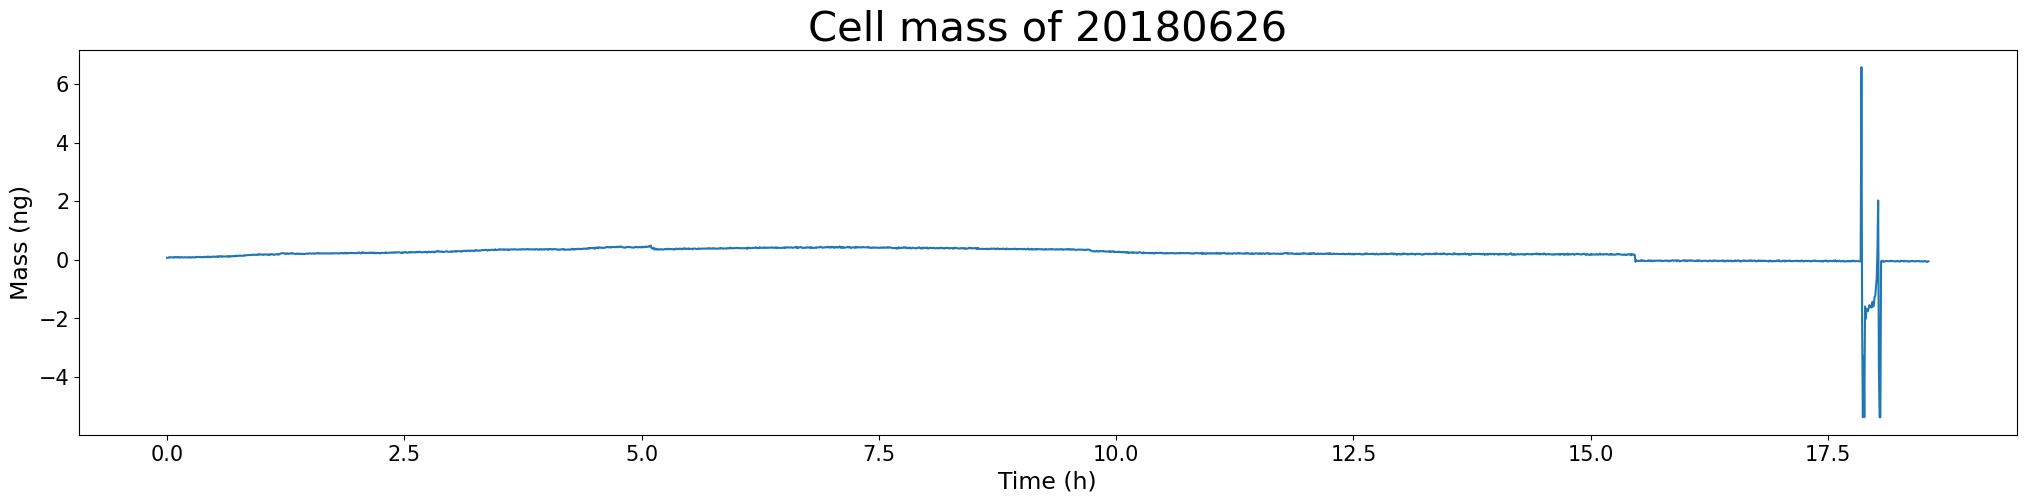

In [16]:
#20180626
plt.figure(figsize=(25, 5))
plt.plot(df26["time"],df26["mass"] )
plt.title("Cell mass", fontdict={"fontsize": 30})
plt.title("Cell mass of 20180626", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

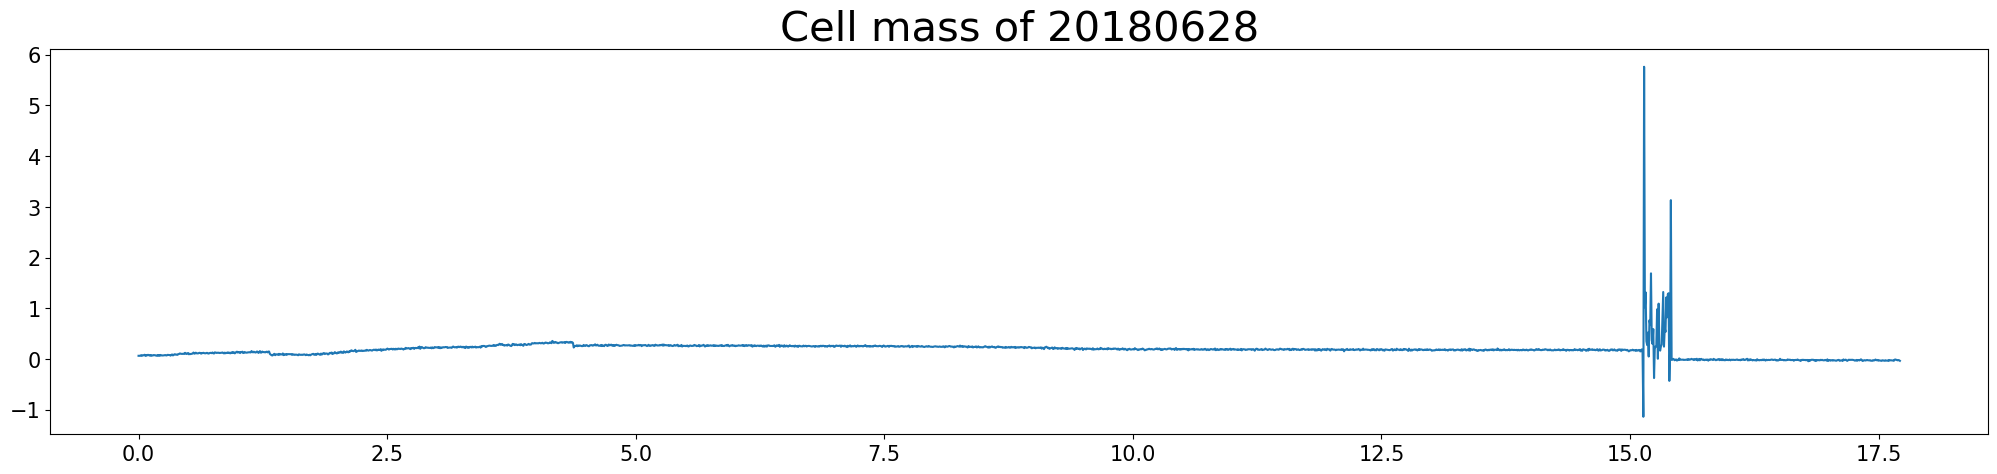

In [17]:
#20180628
plt.figure(figsize=(25, 5))
plt.plot(df28["time"],df28["mass"] )
plt.title("Cell mass", fontdict={"fontsize": 30})
plt.title("Cell mass of 20180628", fontdict={"fontsize": 30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

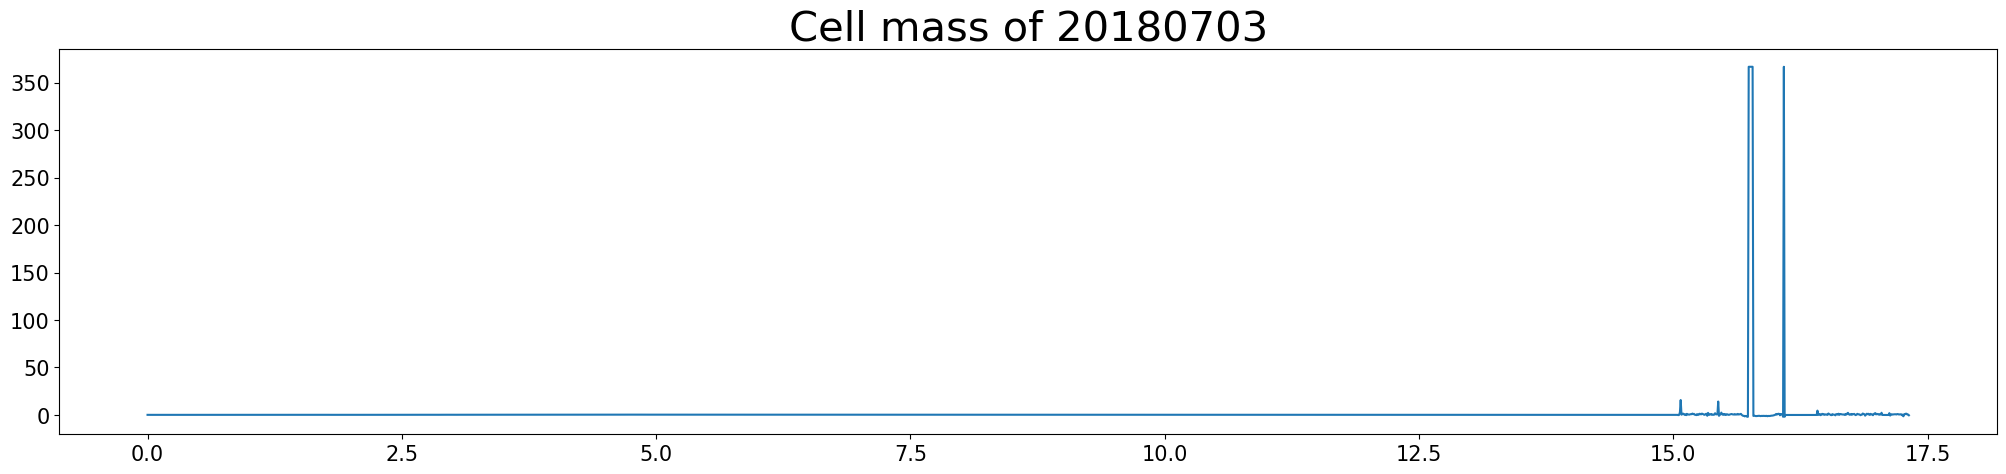

In [18]:
#20180703
plt.figure(figsize=(25, 5))
plt.plot(df703["time"],df703["mass"] )
plt.title("Cell mass", fontdict={"fontsize": 30})
plt.title("Cell mass of 20180703", fontdict={"fontsize": 30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

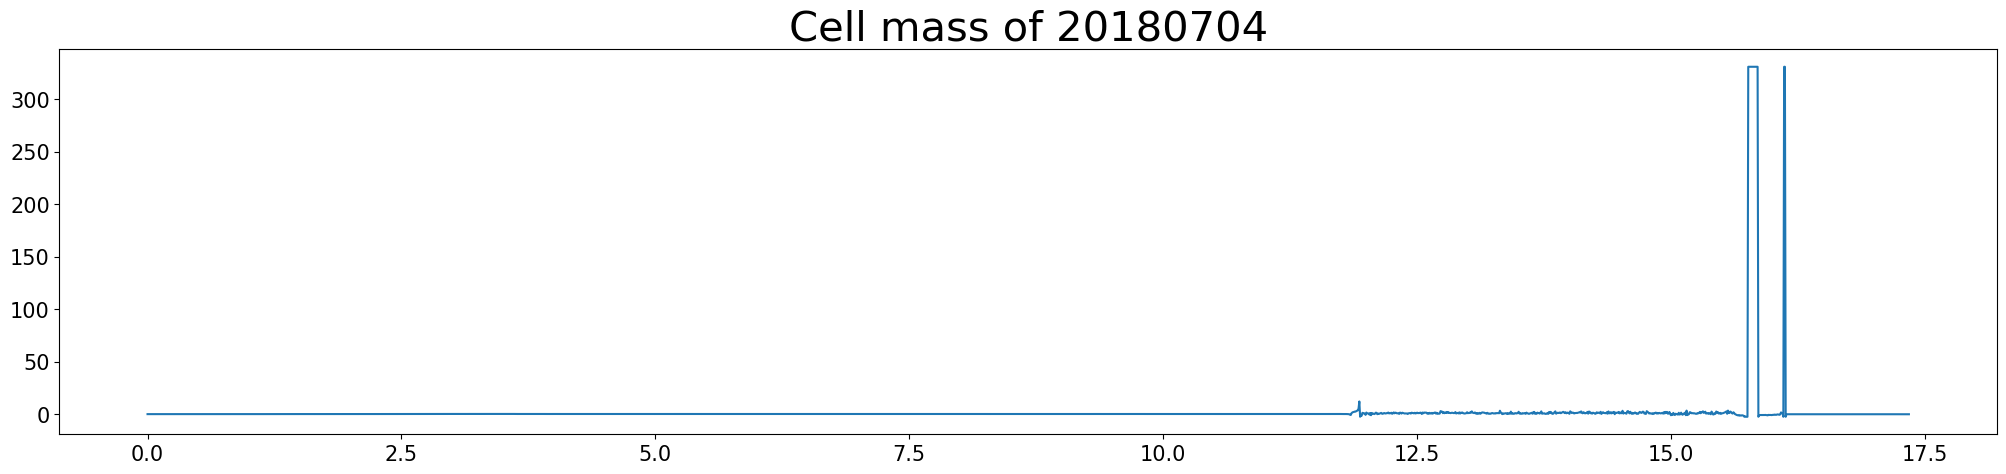

In [19]:
#20180704
plt.figure(figsize=(25, 5))
plt.plot(df704["time"],df704["mass"] )
plt.title("Cell mass", fontdict={"fontsize": 30})
plt.title("Cell mass of 20180704", fontdict={"fontsize": 30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

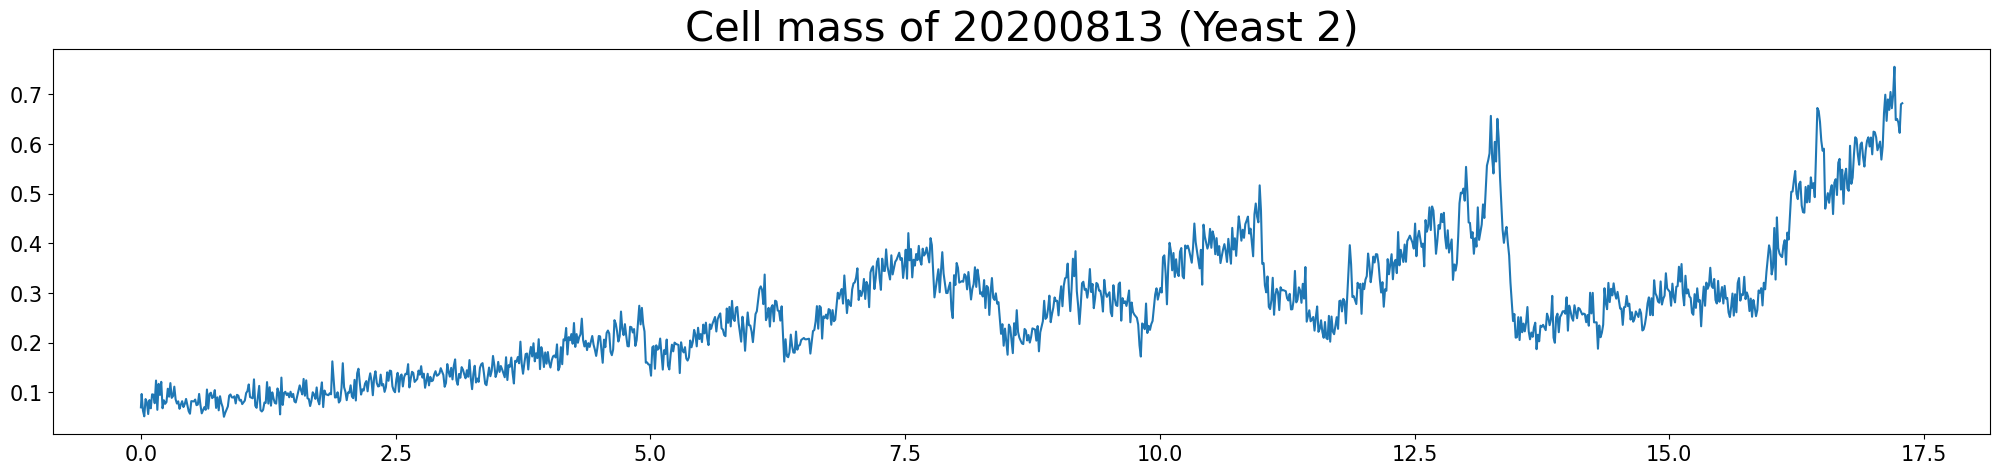

In [20]:
#20200813Y2
plt.figure(figsize=(25, 5))
plt.plot(df13Y2["time"],df13Y2["mass"] )
plt.title("Cell mass", fontdict={"fontsize": 30})
plt.title("Cell mass of 20200813 (Yeast 2)", fontdict={"fontsize": 30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

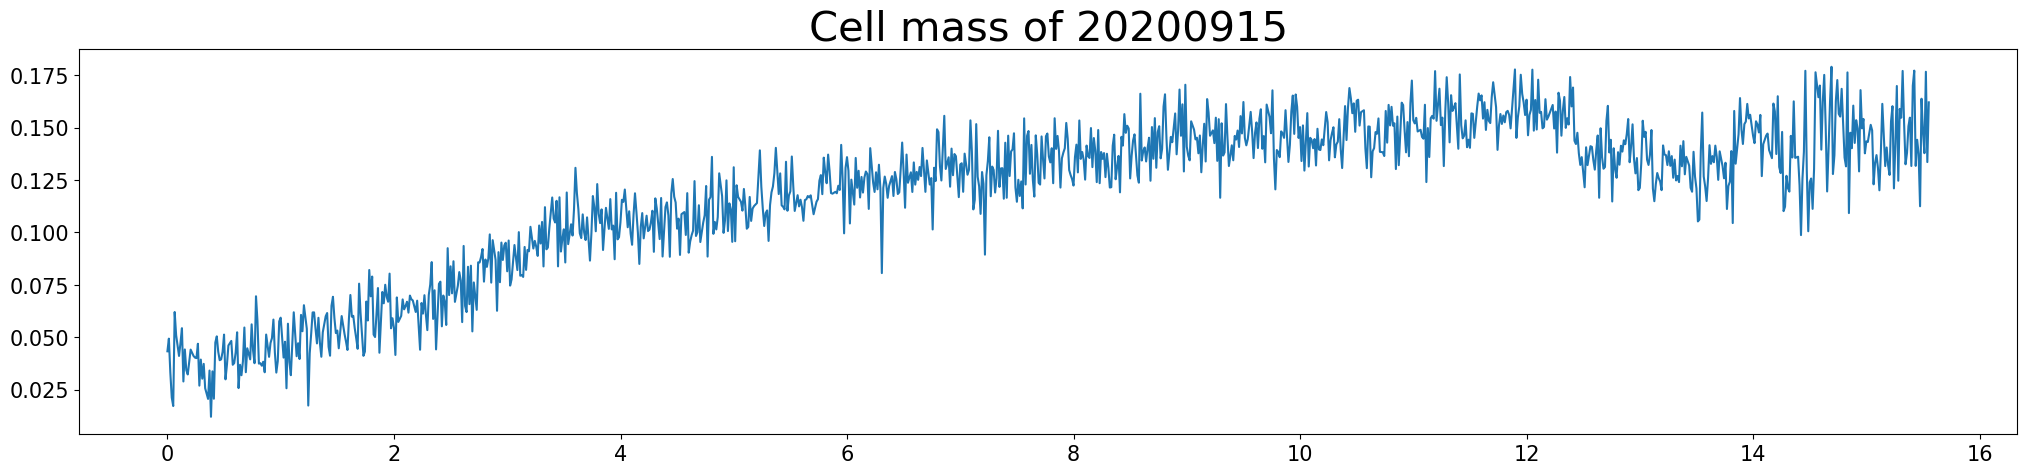

In [21]:
#20200915
plt.figure(figsize=(25, 5))
plt.plot(df15["time"],df15["mass"] )
plt.title("Cell mass", fontdict={"fontsize": 30})
plt.title("Cell mass of 20200915", fontdict={"fontsize": 30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

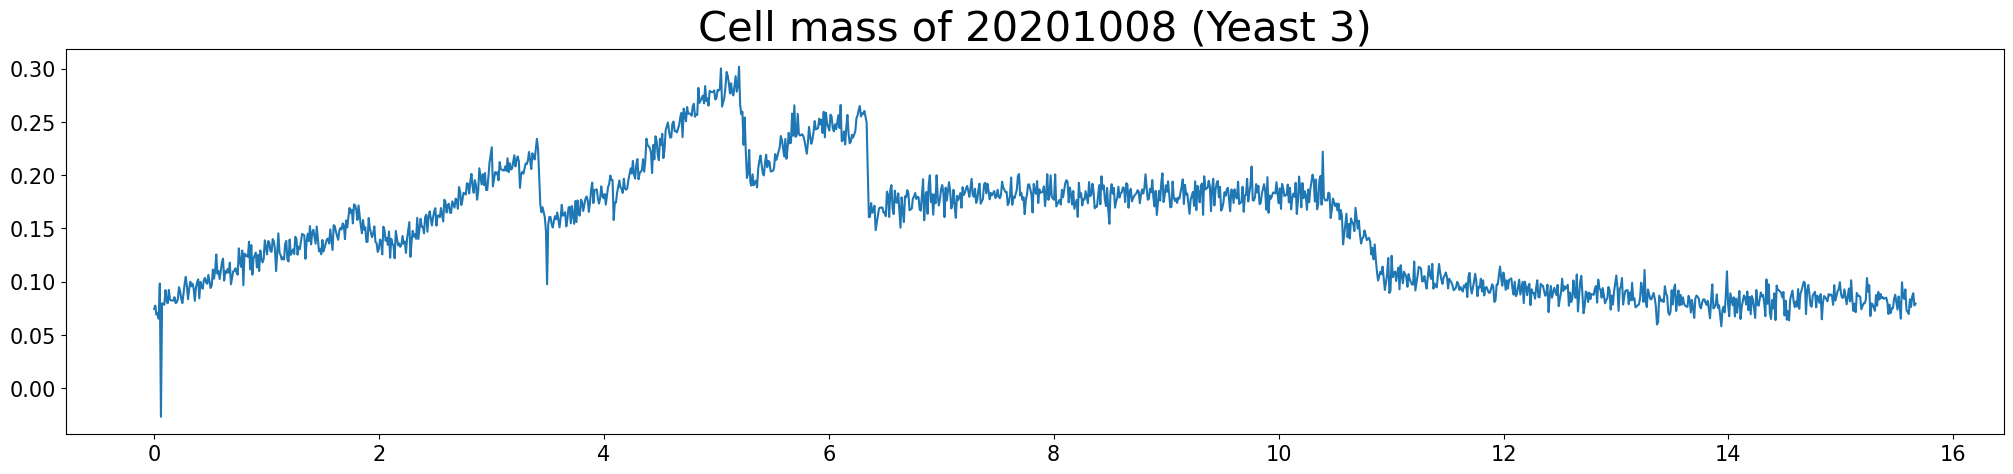

In [22]:
#20201008Y3
plt.figure(figsize=(25, 5))
plt.plot(df008Y3["time"],df008Y3["mass"] )
plt.title("Cell mass", fontdict={"fontsize": 30})
plt.title("Cell mass of 20201008 (Yeast 3)", fontdict={"fontsize": 30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Calculating MP/Motifs/Discords on each

# 20200813 (Yeast 2)

It is recommended to use different window sizes when detecting motifs and discords using the matrix profile. This is because the optimal window size for detecting motifs may be different from that for detecting discords.

In [23]:
y = df13Y2['mass']
x = df13Y2.index
#for motif
m = 8
mp = stumpy.stump(df13Y2['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

,profile,profile index,left profile index,right profile index
434,0.292316,1220,87,1220
1220,0.292316,434,434,1224


Text(0.5, 0.98, 'Finding Motifs')

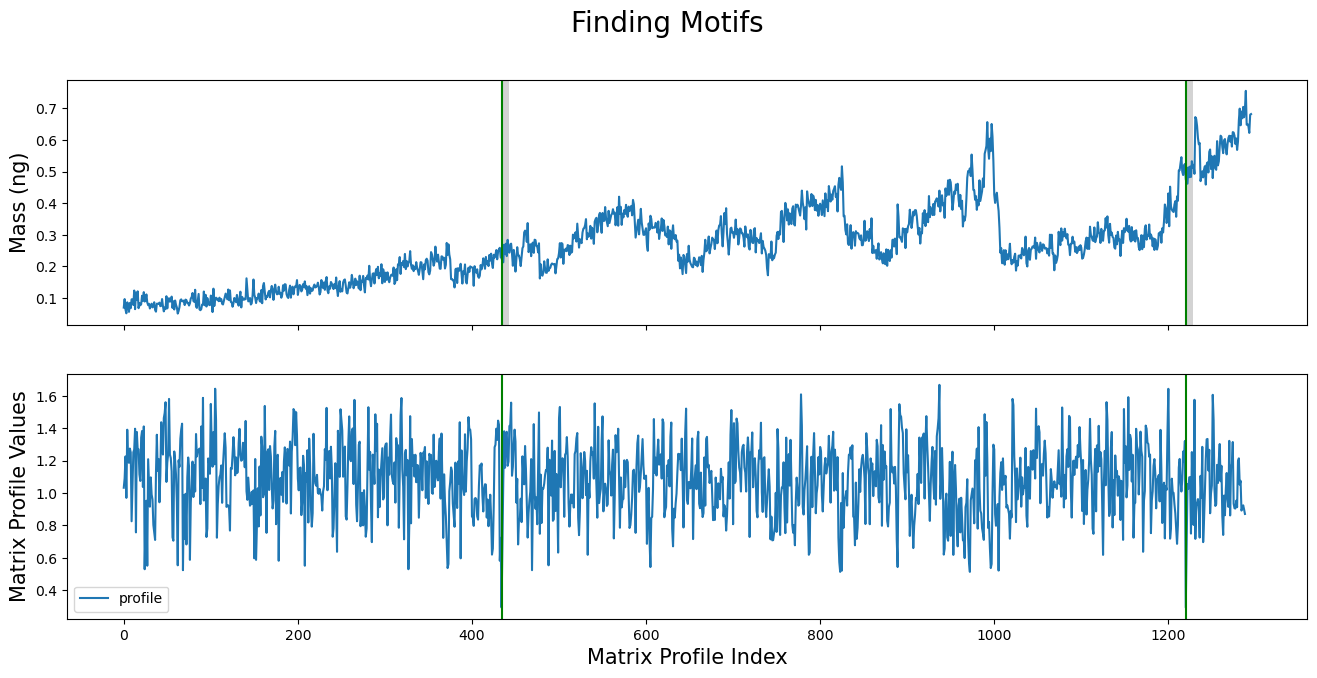

In [24]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

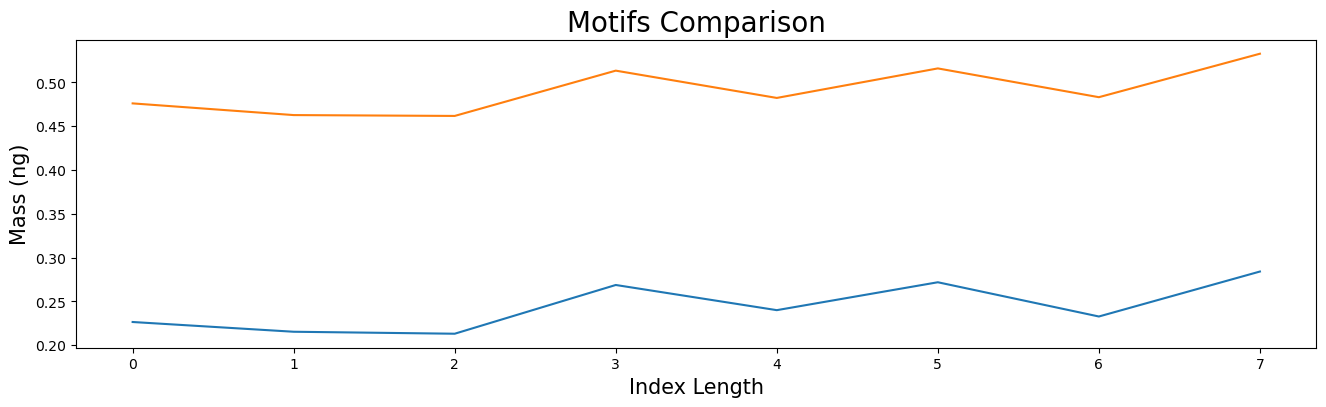

In [25]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [26]:
#for discord
m1 = 220
mp1 = stumpy.stump(df13Y2['mass'], m1)

In [27]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [28]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

,profile,profile index,left profile index,right profile index
989,16.173339,567,567,1074


Text(0.5, 0.98, 'Findig a Discord')

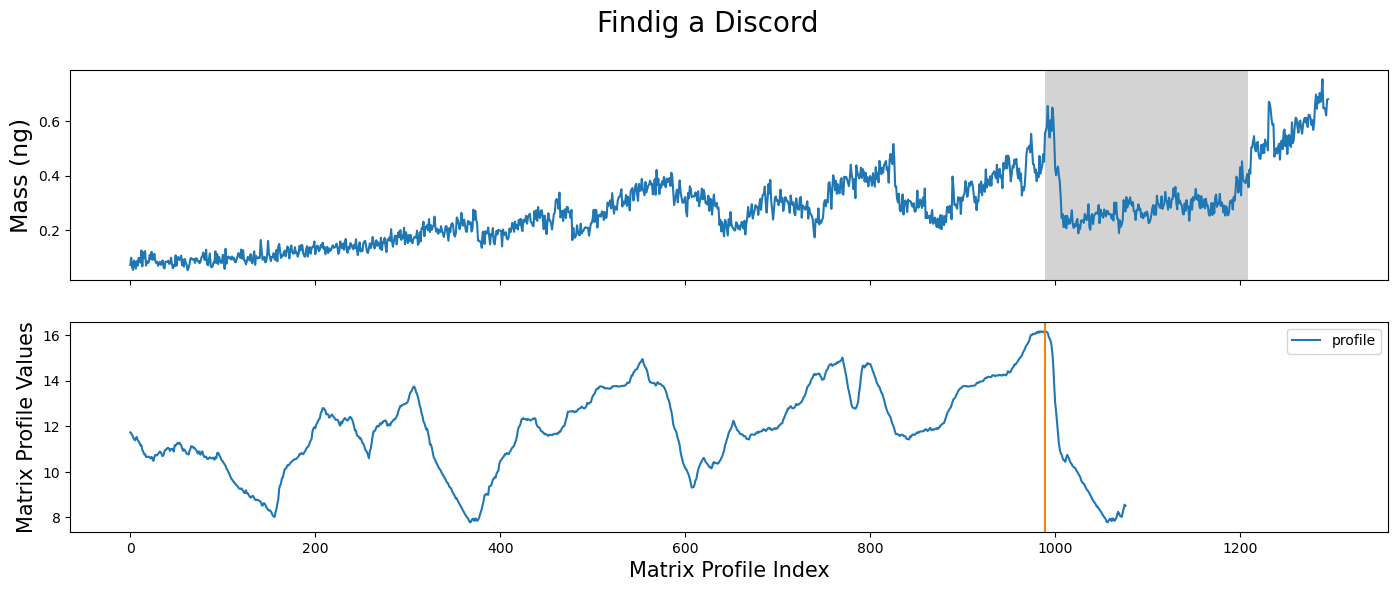

In [29]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [30]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [16.173339364216787] units away


# 20200915

In [31]:
y = df15['mass']
x = df15.index
#for motif
m = 10
mp = stumpy.stump(df15['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

,profile,profile index,left profile index,right profile index
75,0.607995,238,65,238
238,0.607995,75,75,283


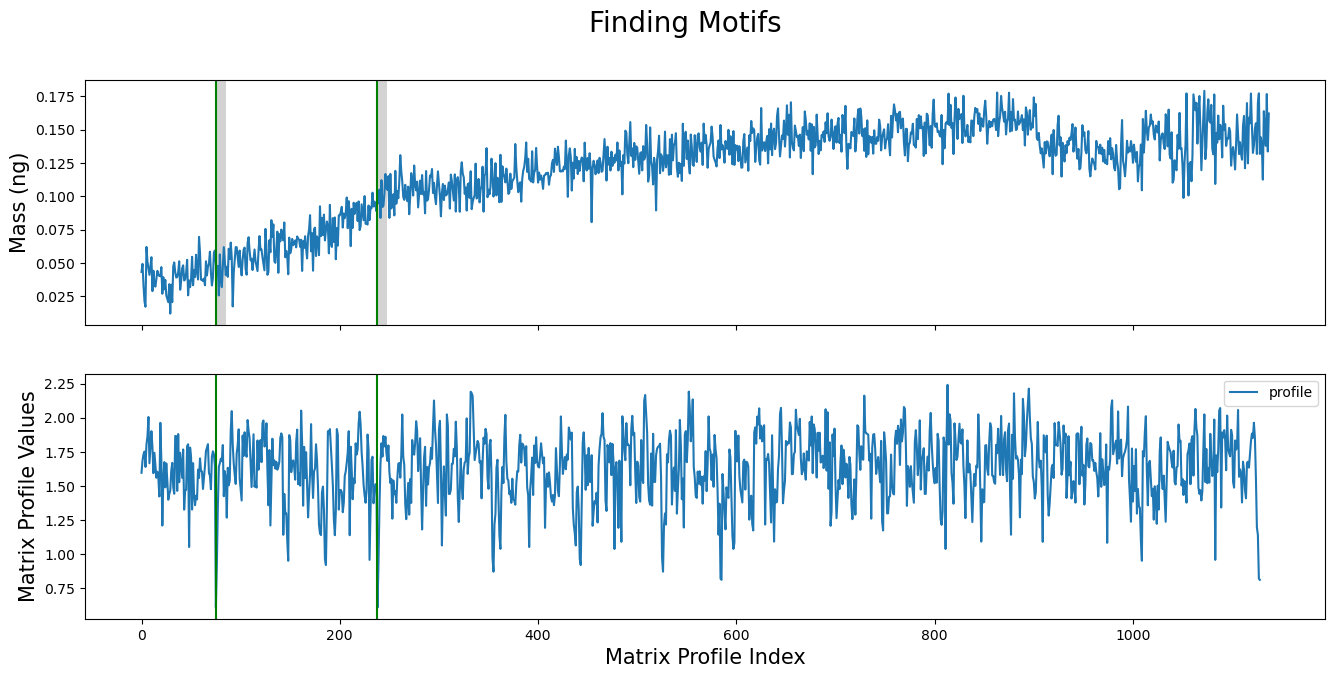

In [32]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

plt.savefig('lav.pdf', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Motifs Comparison')

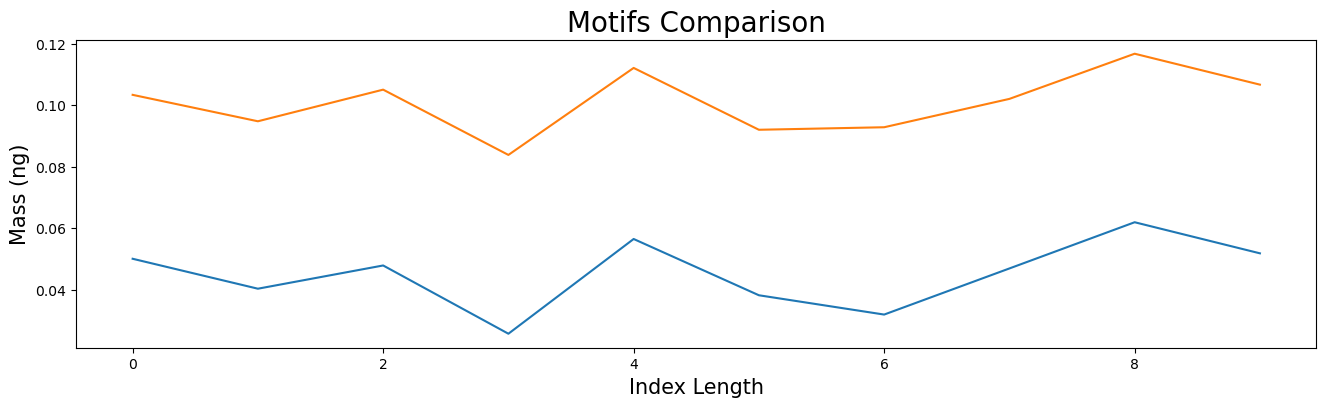

In [33]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

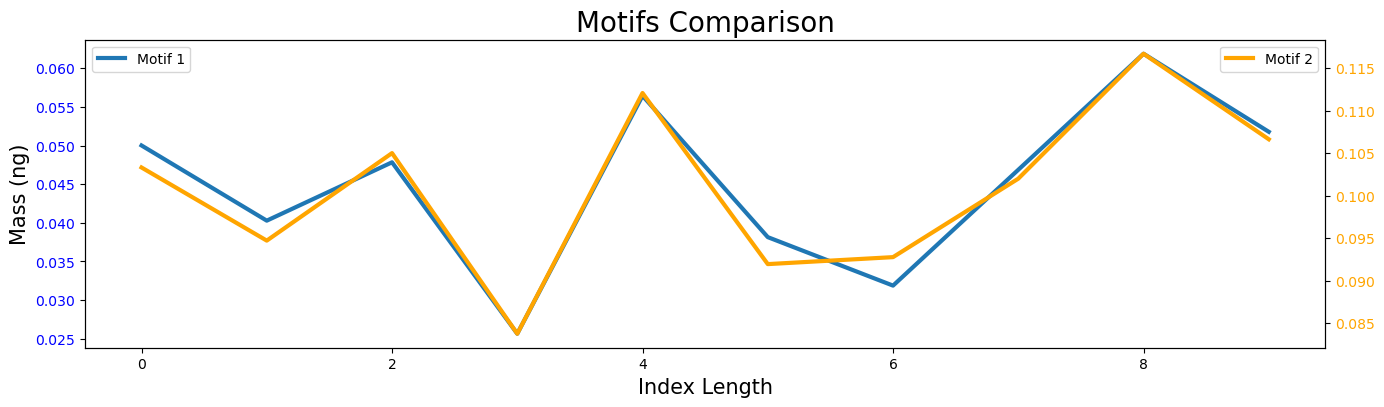

In [34]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)

plt.savefig('lav11.pdf', dpi=300, bbox_inches='tight')

plt.show()




In [35]:
#for discord
m1 = 140
mp1 = stumpy.stump(df15['mass'], m1)

In [36]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [37]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

,profile,profile index,left profile index,right profile index
894,14.947635,717,717,947


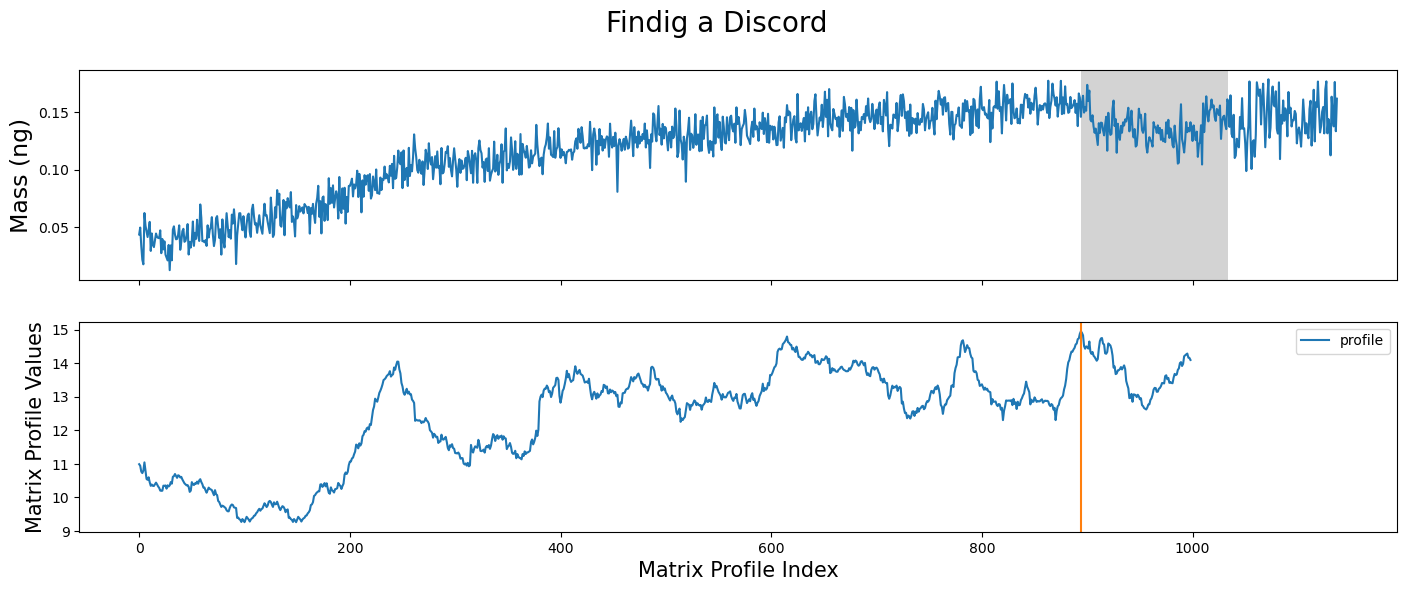

In [38]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17)
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)

plt.savefig('lav12.pdf', dpi=300, bbox_inches='tight')


In [39]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [14.947634738495799] units away


# 20201008 (Yeast 3)

In [40]:
y = df008Y3['mass']
x = df008Y3.index
#for motif
m = 8
mp = stumpy.stump(df008Y3['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

,profile,profile index,left profile index,right profile index
544,0.381718,845,341,845
845,0.381718,544,544,1114


Text(0.5, 0.98, 'Finding Motifs')

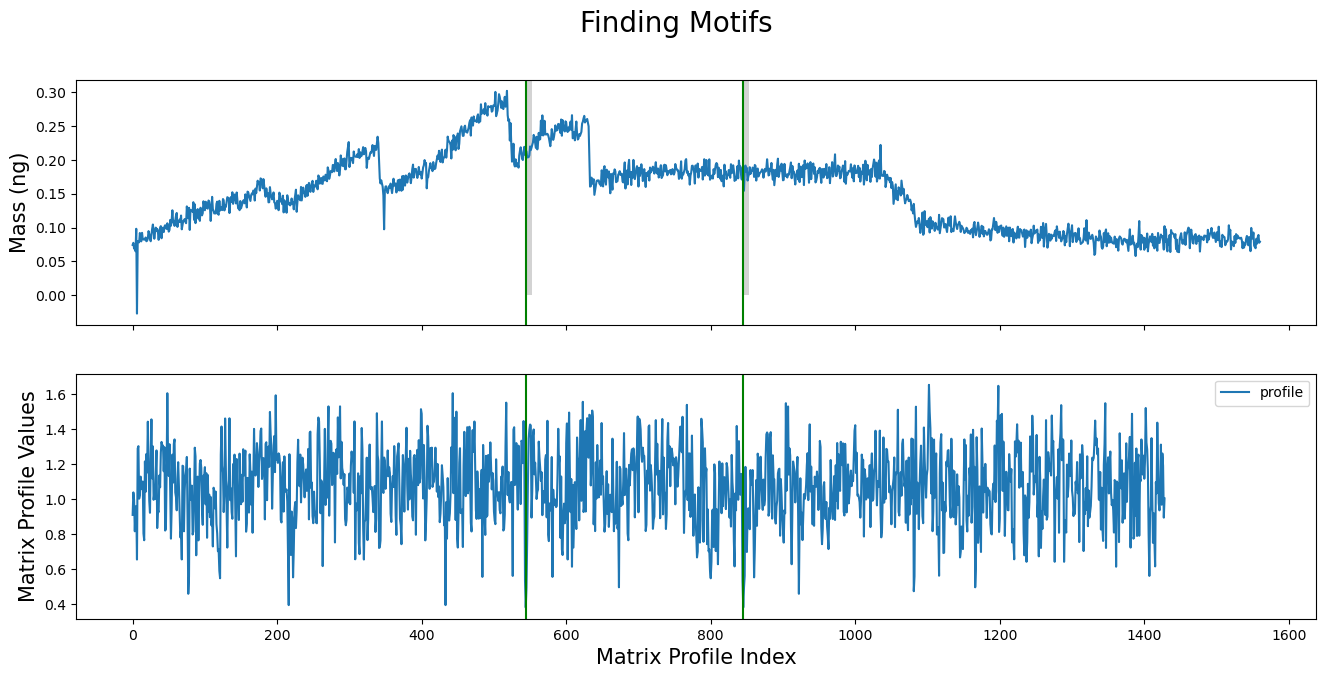

In [41]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)


ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

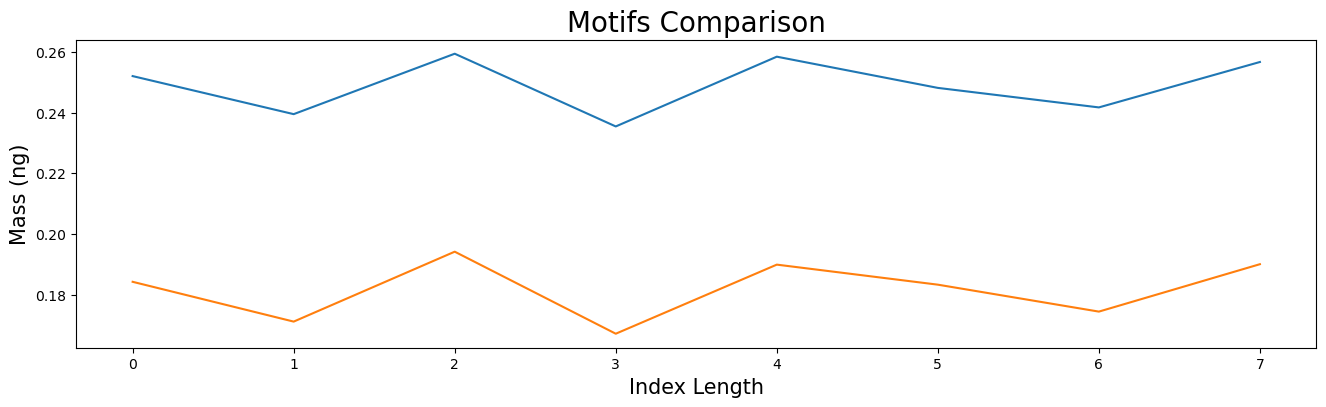

In [42]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [43]:
#for discord
m1 = 190
mp1 = stumpy.stump(df008Y3['mass'], m1)

In [44]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [45]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

,profile,profile index,left profile index,right profile index
705,17.565923,639,639,784


Text(0.5, 0.98, 'Findig a Discord')

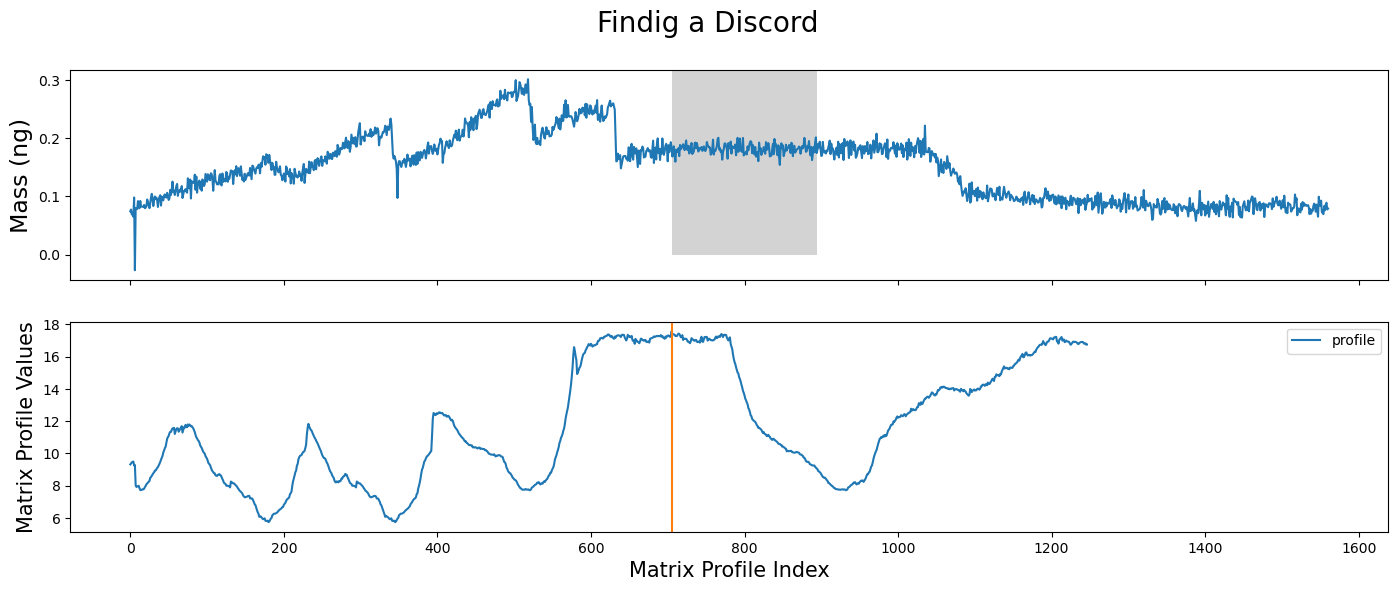

In [46]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [47]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [17.56592260759912] units away


# Finding Similar Patterns in Datasets

Comparing the datasets that have similar trajectory and shape to find hidden similar patterns 

# 20200813 (Yeast 2) and 20200915

In [48]:
m = 9
mp13Y2 = stumpy.stump(T_A = df13Y2['mass'],
                  m = m,
                  T_B = df15['mass'],
                  ignore_trivial = False)

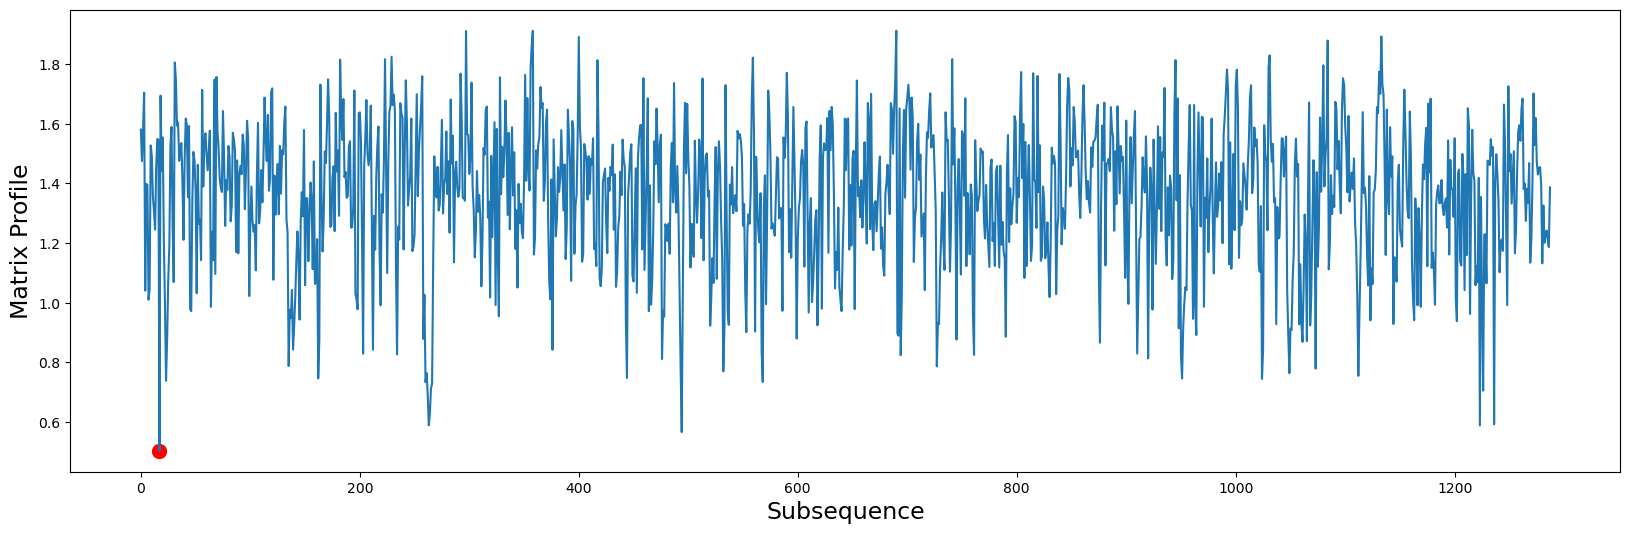

In [49]:
df13Y2_motif_index = mp13Y2[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df13Y2_motif_index,
               mp13Y2[df13Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp13Y2[:,0])
plt.show()

In [50]:
df13Y2_motif_index = mp13Y2[:, 0].argmin()
print(f'The motif is located at index {df13Y2_motif_index} of "20200813 (Yeast 2)"')

The motif is located at index 17 of "20200813 (Yeast 2)"


In [51]:
df15_motif_index = mp13Y2[df13Y2_motif_index, 1]
print(f'The motif is located at index {df15_motif_index} of "20200915"')


The motif is located at index 1041 of "20200915"


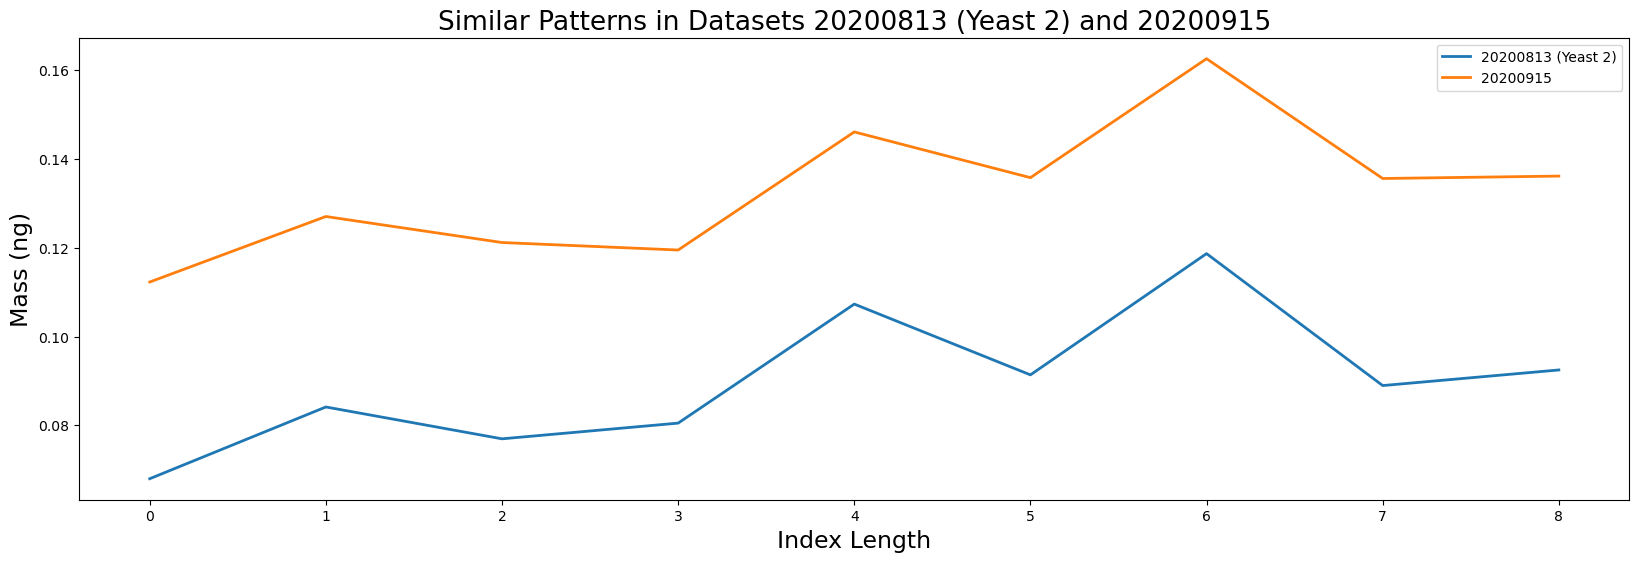

In [52]:
plt.plot(df13Y2['mass'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, label='20200813 (Yeast 2)', linewidth=2)
plt.plot(df15['mass'].iloc[df15_motif_index:df15_motif_index+m].values, label='20200915', linewidth=2)

plt.title('Similar Patterns in Datasets 20200813 (Yeast 2) and 20200915', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

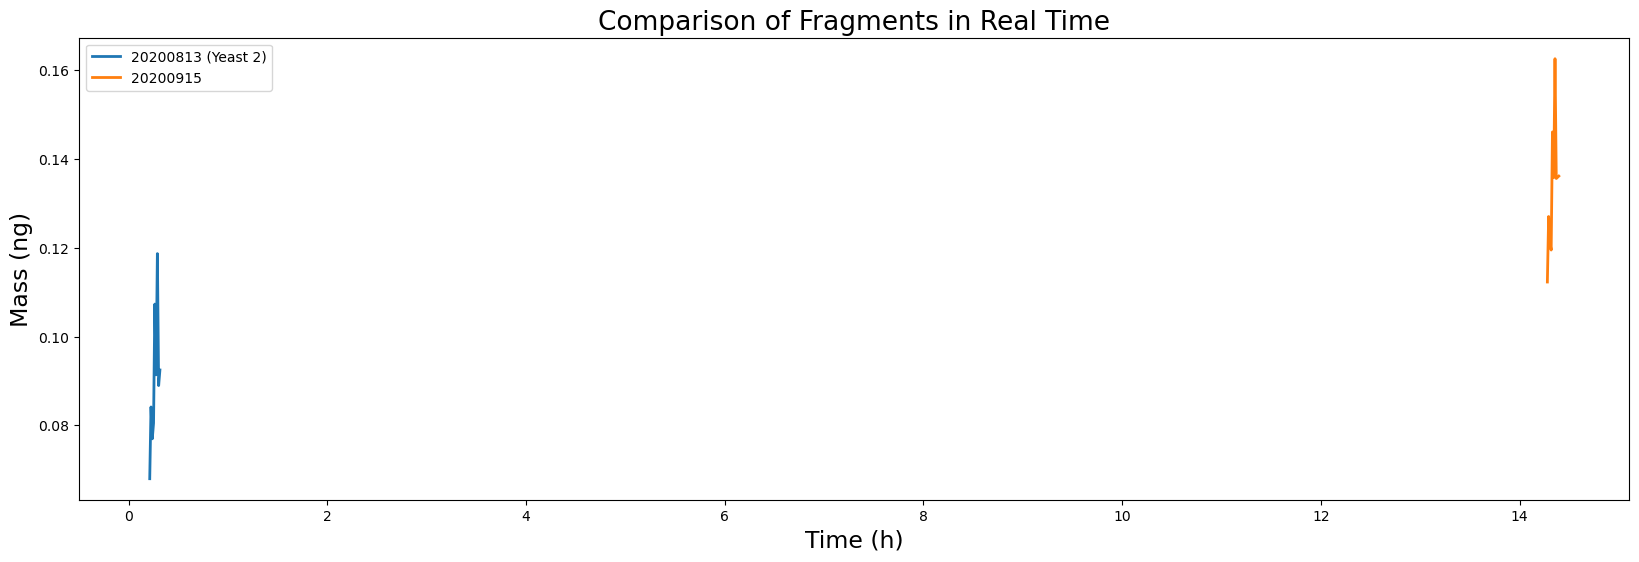

In [53]:
plt.plot(df13Y2['time'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, df13Y2['mass'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, label='20200813 (Yeast 2)', linewidth=2)
plt.plot(df15['time'].iloc[df15_motif_index : df15_motif_index + m].values, df15['mass'].iloc[df15_motif_index : df15_motif_index + m].values, label='20200915', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

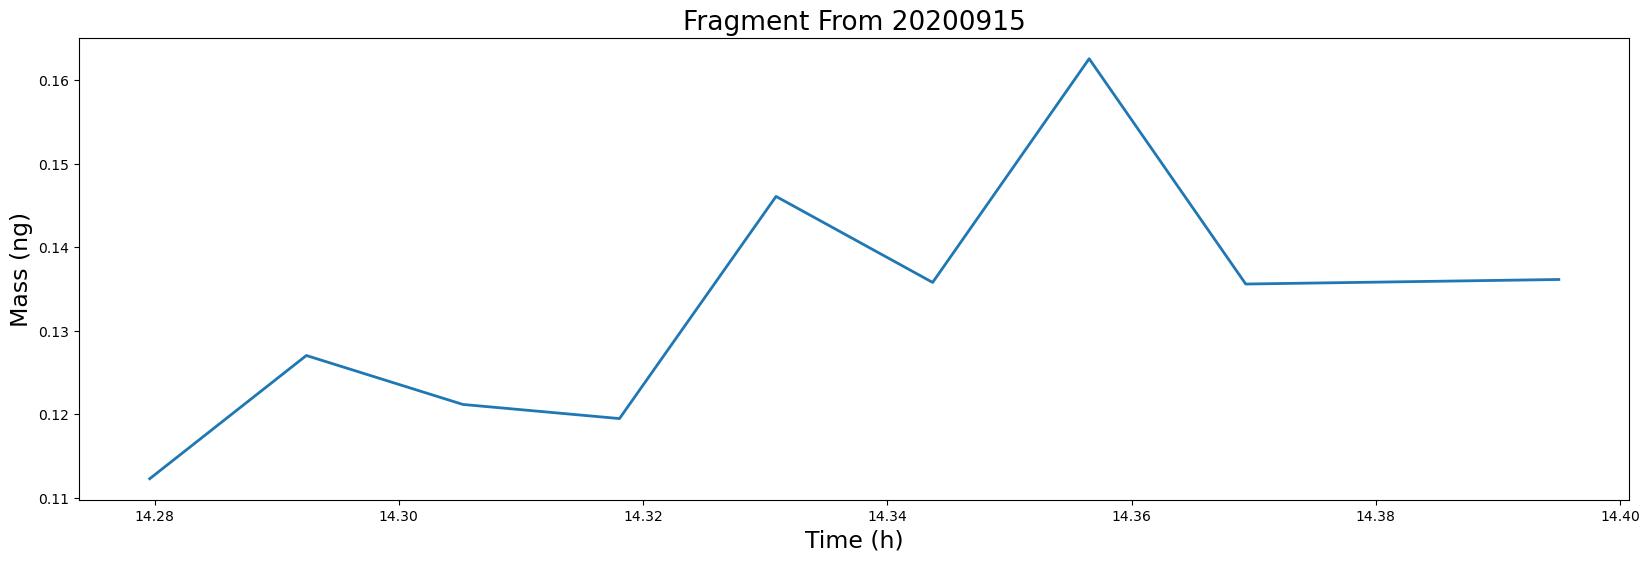

In [54]:
plt.plot(df15['time'].iloc[df15_motif_index : df15_motif_index + m].values, df15['mass'].iloc[df15_motif_index : df15_motif_index + m].values, label='20200915', linewidth=2)

plt.title('Fragment From 20200915', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

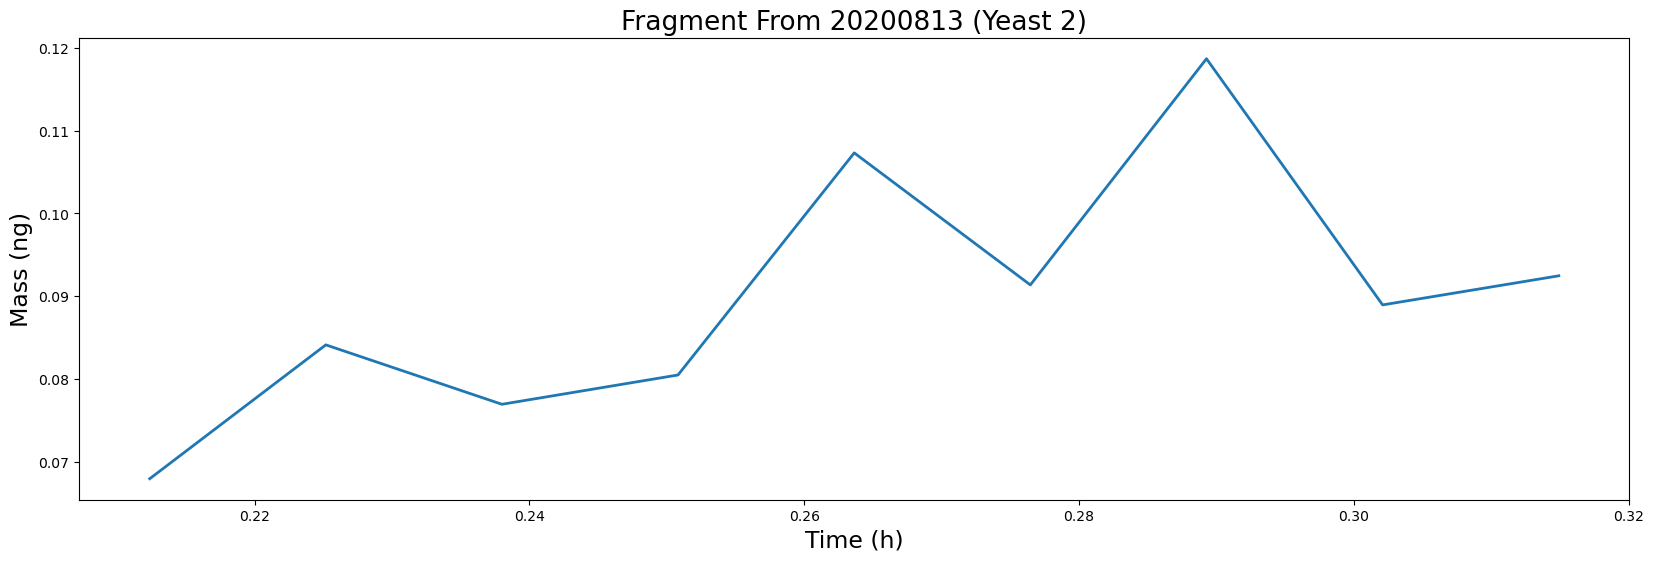

In [55]:
plt.plot(df13Y2['time'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, df13Y2['mass'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, label='20200813 (Yeast 2)', linewidth=2)

plt.title('Fragment From 20200813 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

# 20200813 (Yeast 2) and 20201008 (Yeast 3)

In [56]:
m = 7
mp13Y2 = stumpy.stump(T_A = df13Y2['mass'],
                  m = m,
                  T_B = df008Y3['mass'],
                  ignore_trivial = False)

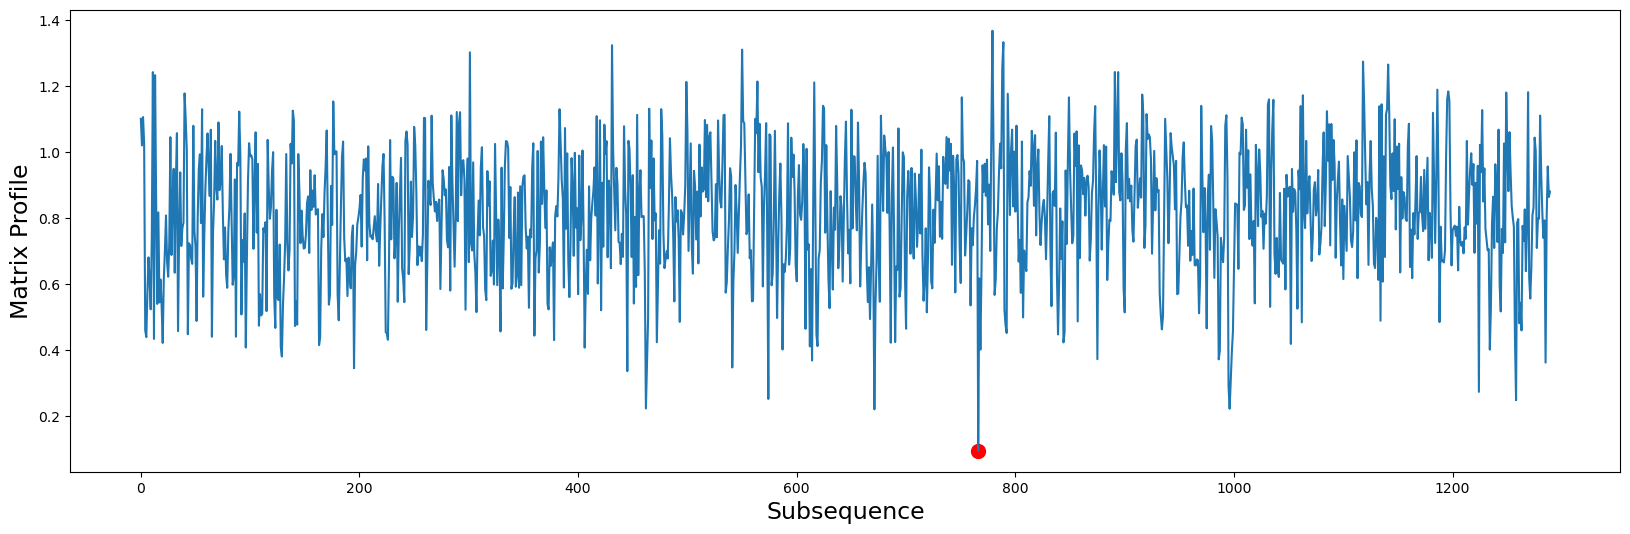

In [57]:
df13Y2_motif_index = mp13Y2[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df13Y2_motif_index,
               mp13Y2[df13Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp13Y2[:,0])
plt.show()

In [58]:
df13Y2_motif_index = mp13Y2[:, 0].argmin()
print(f'The motif is located at index {df13Y2_motif_index} of "20200813 (Yeast 2) "')

The motif is located at index 766 of "20200813 (Yeast 2) "


In [59]:
df008Y3_motif_index = mp13Y2[df13Y2_motif_index, 1]
print(f'The motif is located at index {df008Y3_motif_index} of "20201008 (Yeast 3)"')


The motif is located at index 106 of "20201008 (Yeast 3)"


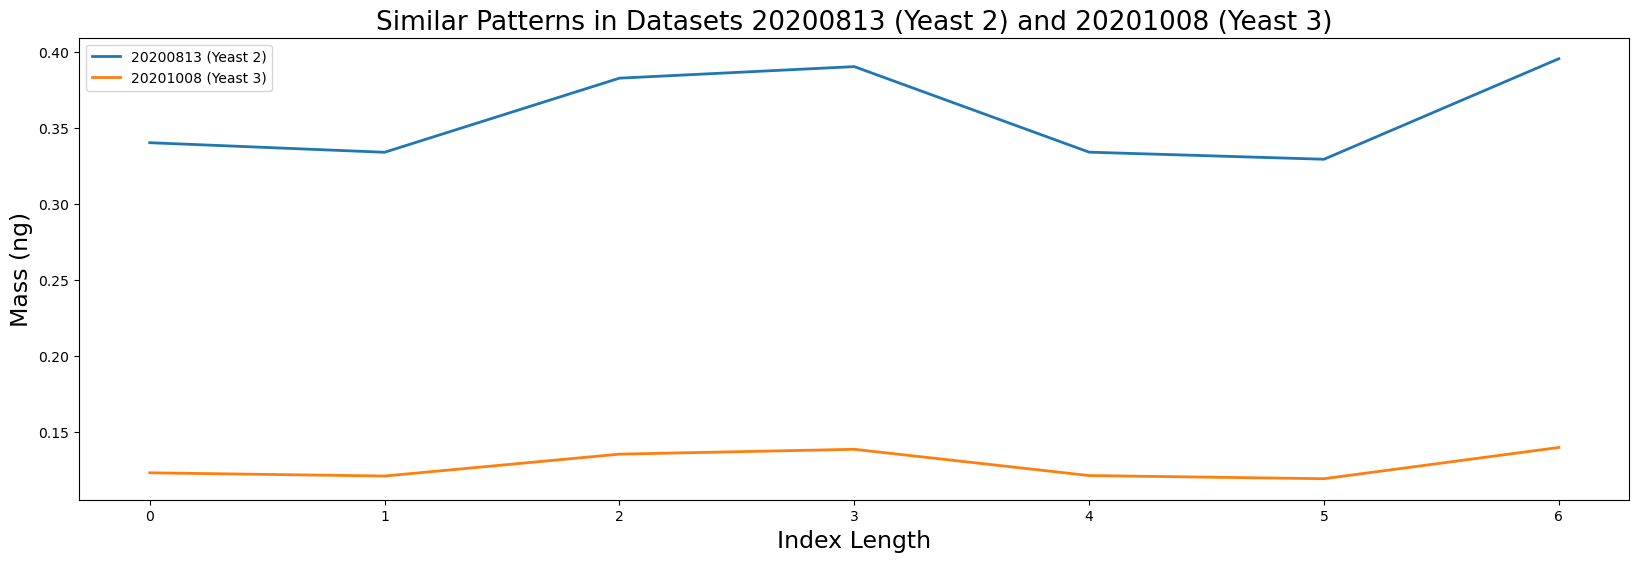

In [60]:
plt.plot(df13Y2['mass'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, label='20200813 (Yeast 2)', linewidth=2)
plt.plot(df008Y3['mass'].iloc[df008Y3_motif_index:df008Y3_motif_index+m].values, label='20201008 (Yeast 3)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200813 (Yeast 2) and 20201008 (Yeast 3)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

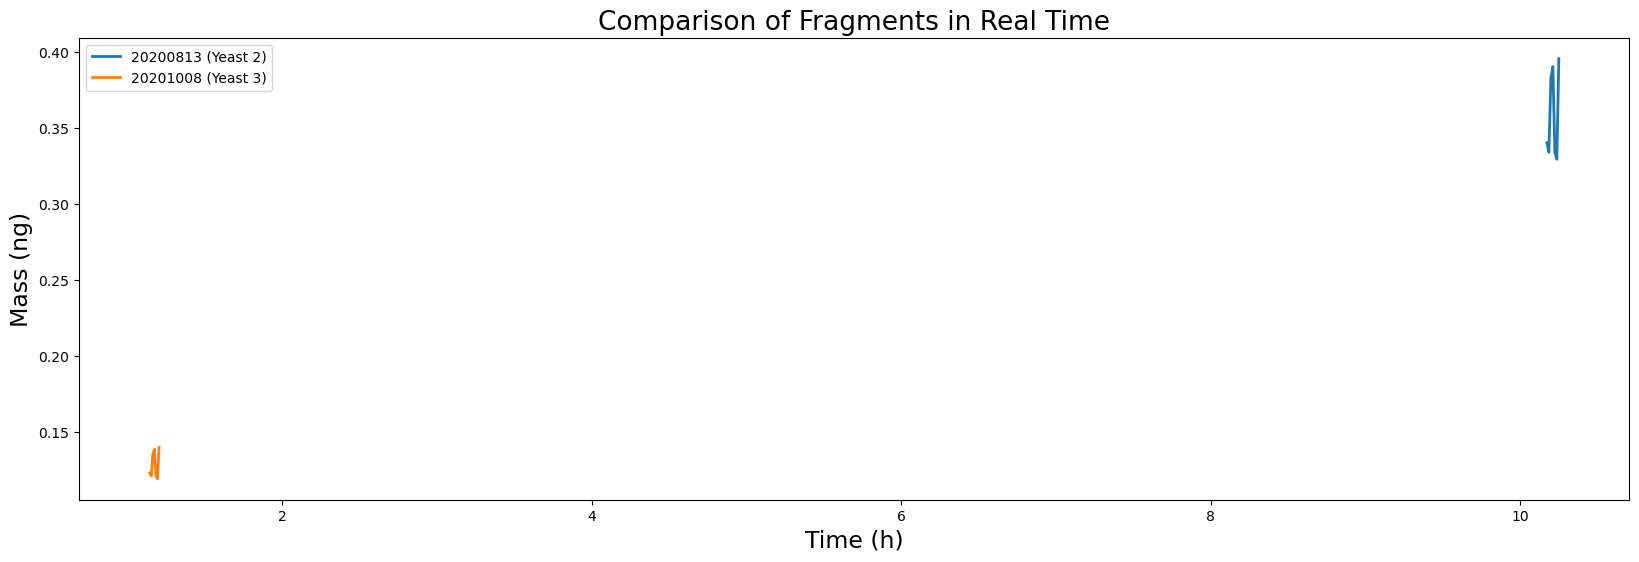

In [61]:
plt.plot(df13Y2['time'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, df13Y2['mass'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, label='20200813 (Yeast 2)', linewidth=2)
plt.plot(df008Y3['time'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, df008Y3['mass'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, label='20201008 (Yeast 3)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)


plt.legend()
plt.show()

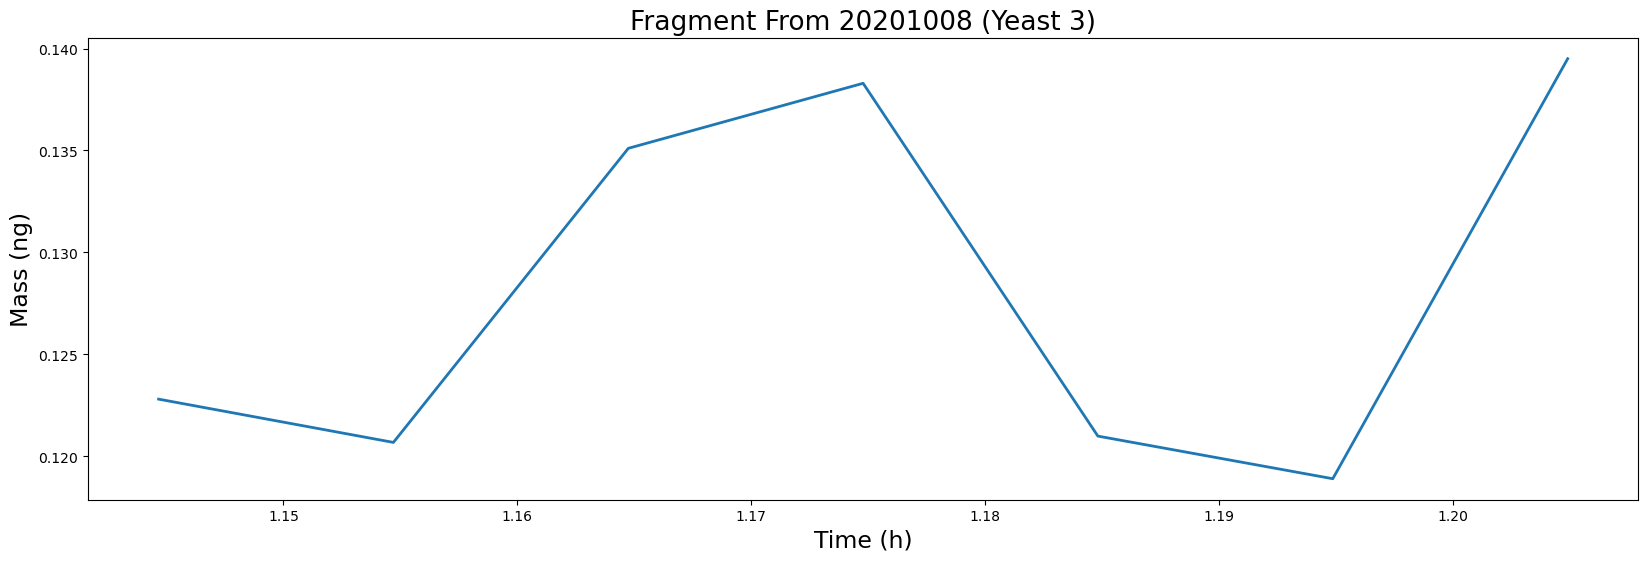

In [62]:
plt.plot(df008Y3['time'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, df008Y3['mass'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, label='20201008 (Yeast 3)', linewidth=2)

plt.title('Fragment From 20201008 (Yeast 3)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

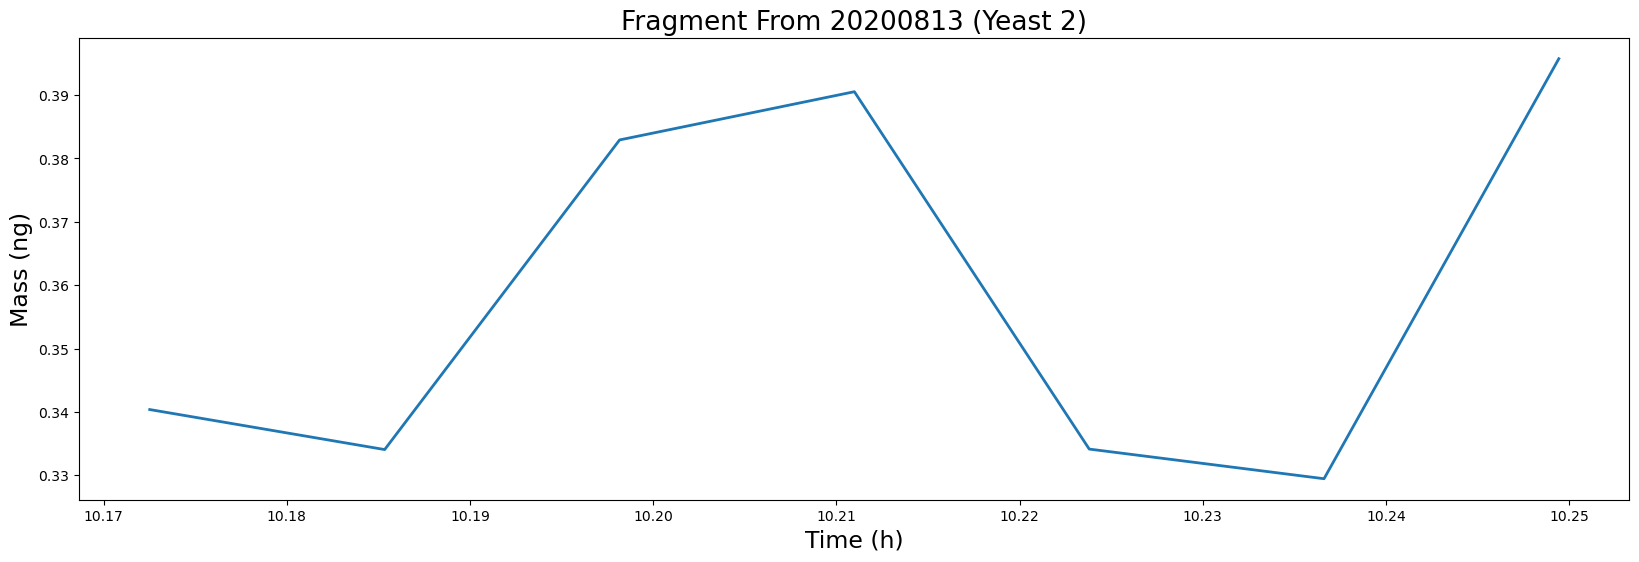

In [63]:
plt.plot(df13Y2['time'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, df13Y2['mass'].iloc[df13Y2_motif_index : df13Y2_motif_index + m].values, label='20200813 (Yeast 2)', linewidth=2)

plt.title('Fragment From 20200813 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

# 20200915 and 20201008 (Yeast 3)

In [64]:
m = 9
mp15 = stumpy.stump(T_A = df15['mass'],
                  m = m,
                  T_B = df008Y3['mass'],
                  ignore_trivial = False)

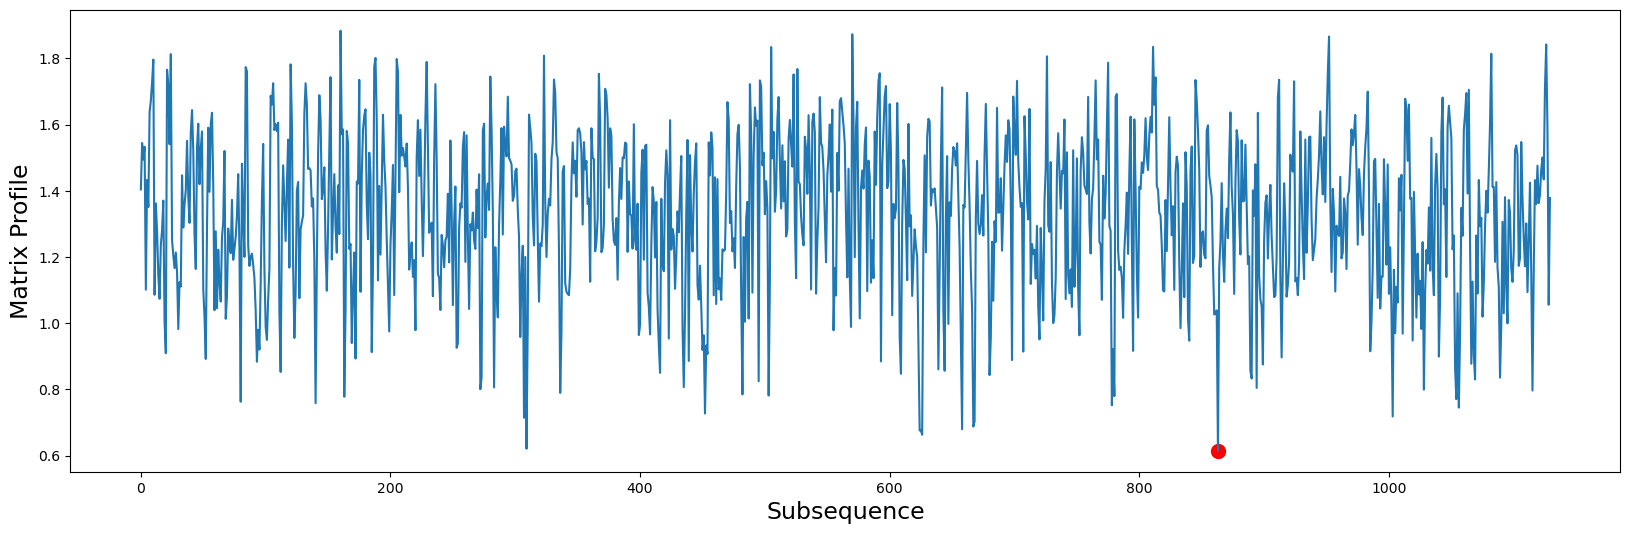

In [65]:
df15_motif_index = mp15[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df15_motif_index,
               mp15[df15_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp15[:,0])
plt.show()

In [66]:
df15_motif_index = mp15[:, 0].argmin()
print(f'The motif is located at index {df15_motif_index} of "20200915"')

The motif is located at index 863 of "20200915"


In [67]:
df008Y3_motif_index = mp15[df15_motif_index, 1]
print(f'The motif is located at index {df008Y3_motif_index} of "20201008 (Yeast 3)"')


The motif is located at index 461 of "20201008 (Yeast 3)"


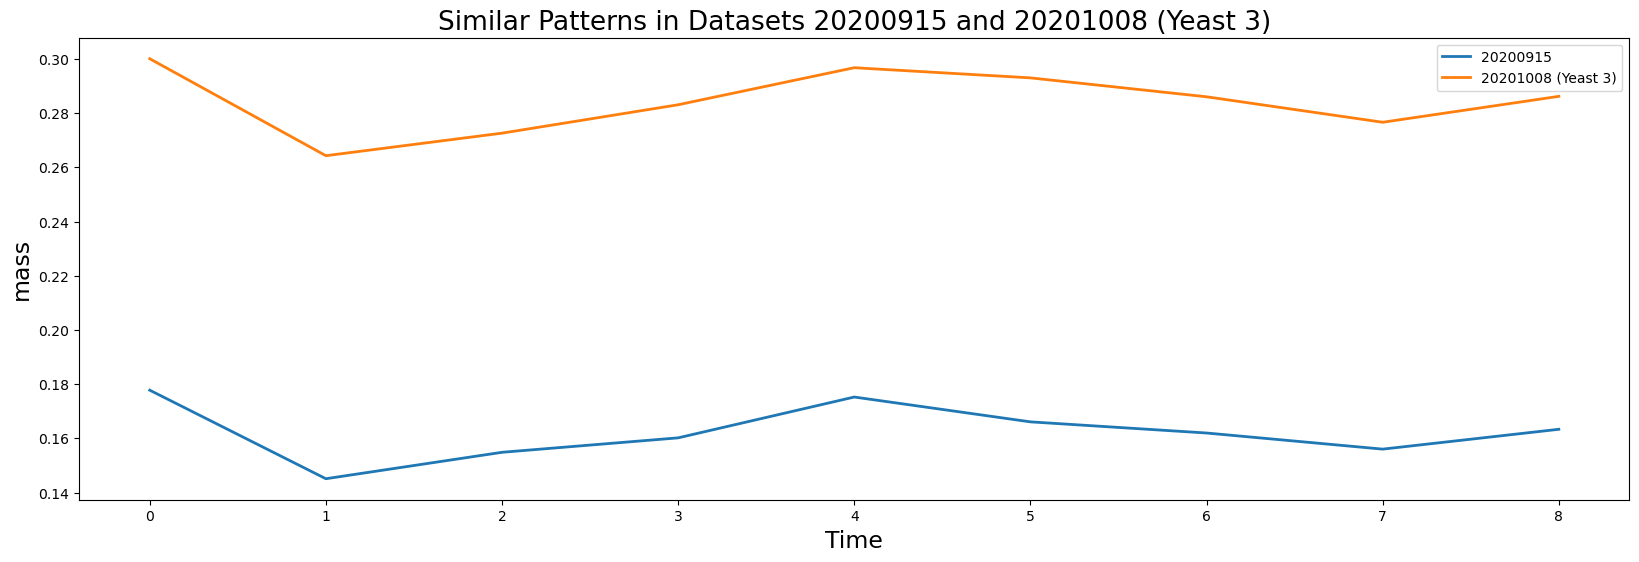

In [68]:
plt.plot(df15['mass'].iloc[df15_motif_index : df15_motif_index + m].values, label='20200915', linewidth=2)
plt.plot(df008Y3['mass'].iloc[df008Y3_motif_index:df008Y3_motif_index+m].values, label='20201008 (Yeast 3)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200915 and 20201008 (Yeast 3)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.xlabel('Time')
plt.ylabel('mass')

plt.legend()

plt.show()

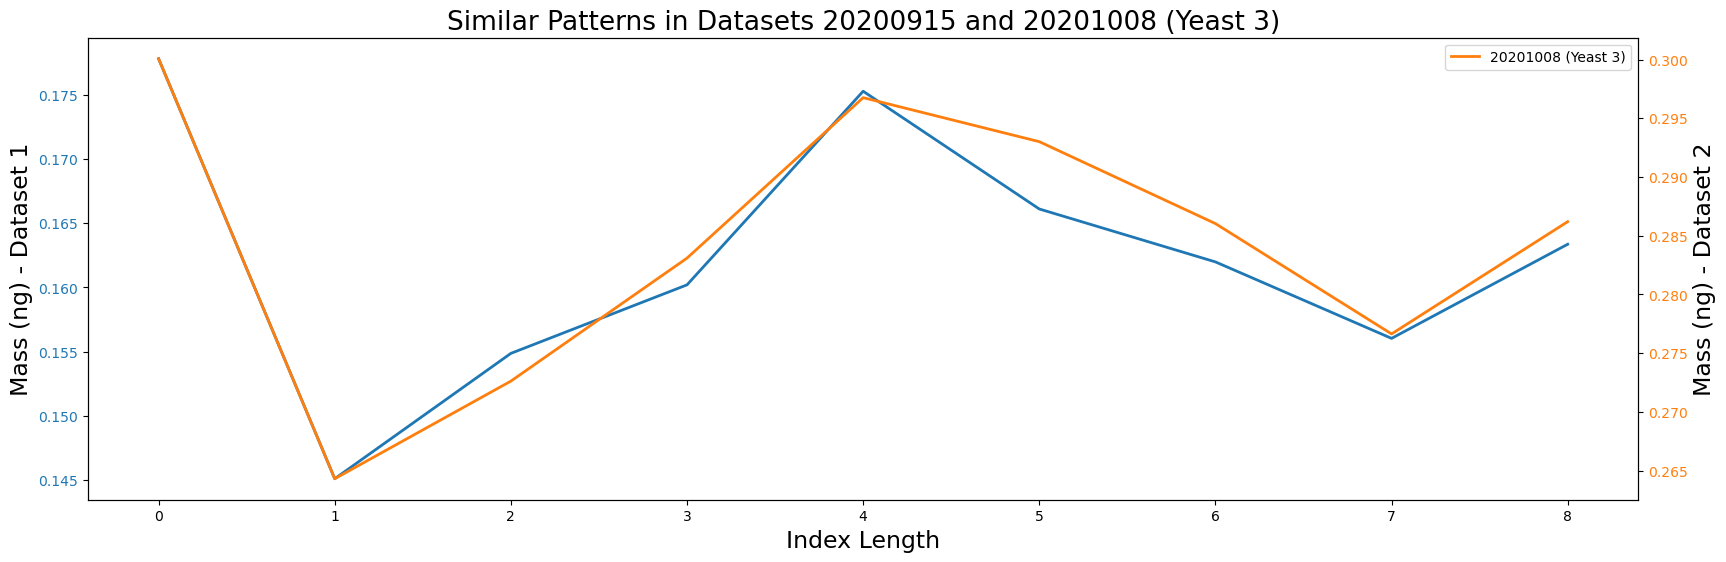

In [69]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df15['mass'].iloc[df15_motif_index : df15_motif_index + m].values, label='20200915', linewidth=2, color='tab:blue')
ax2.plot(df008Y3['mass'].iloc[df008Y3_motif_index:df008Y3_motif_index+m].values, label='20201008 (Yeast 3)', linewidth=2, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20200915 and 20201008 (Yeast 3)', fontsize=19)

plt.legend()

plt.show()


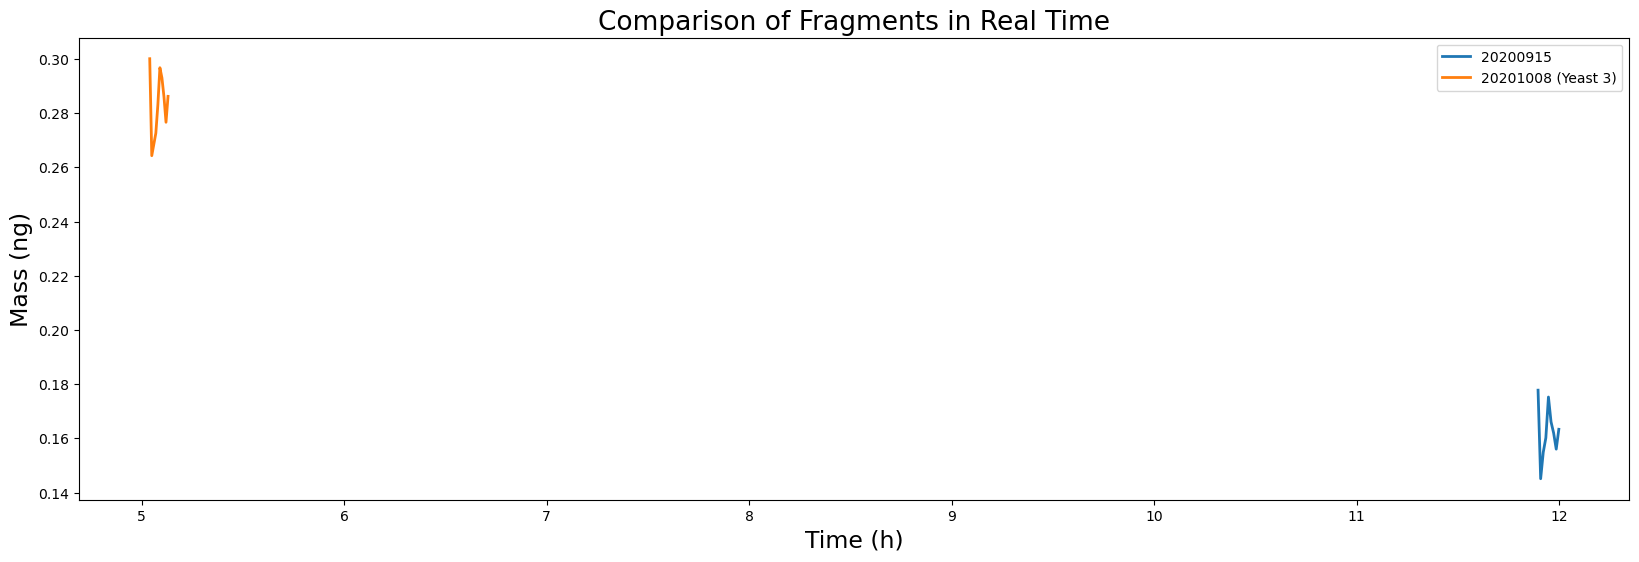

In [70]:
plt.plot(df15['time'].iloc[df15_motif_index : df15_motif_index + m].values, df15['mass'].iloc[df15_motif_index : df15_motif_index + m].values, label='20200915', linewidth=2)
plt.plot(df008Y3['time'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, df008Y3['mass'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, label='20201008 (Yeast 3)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)


plt.legend()
plt.show()

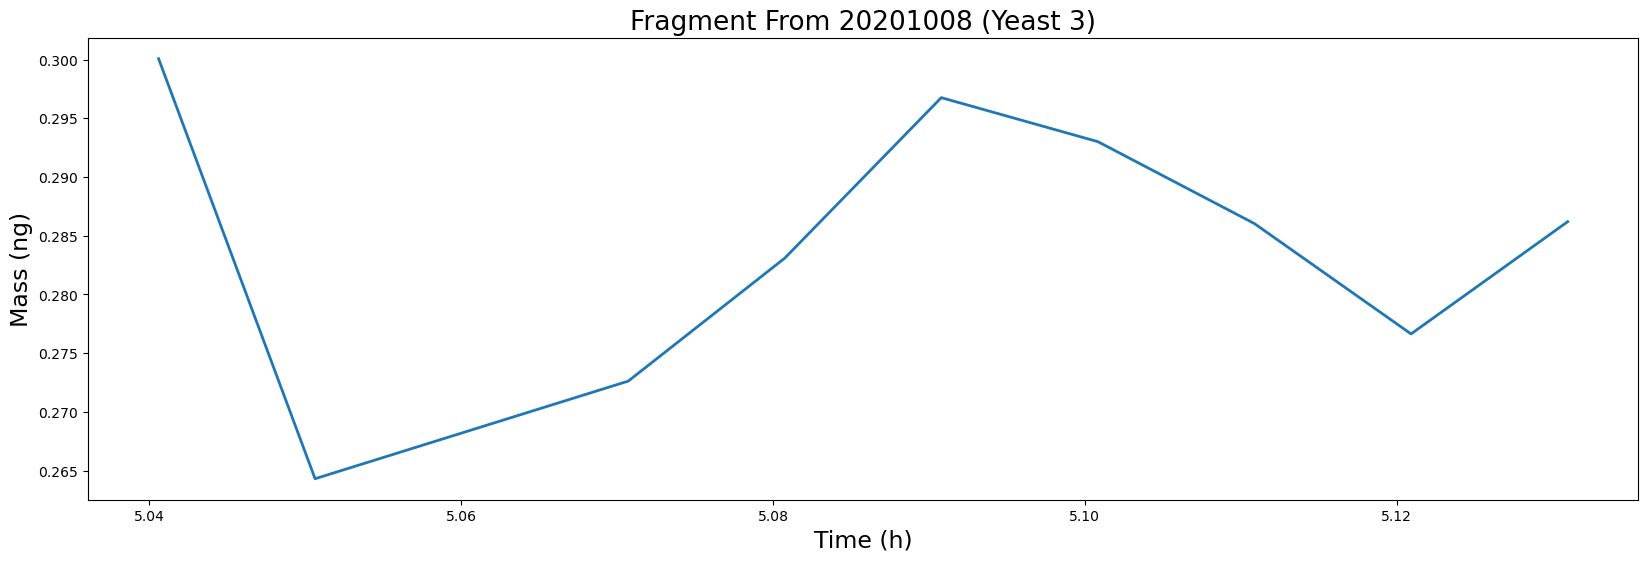

In [71]:
plt.plot(df008Y3['time'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, df008Y3['mass'].iloc[df008Y3_motif_index : df008Y3_motif_index + m].values, label='20201008 (Yeast 3)', linewidth=2)

plt.title('Fragment From 20201008 (Yeast 3)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

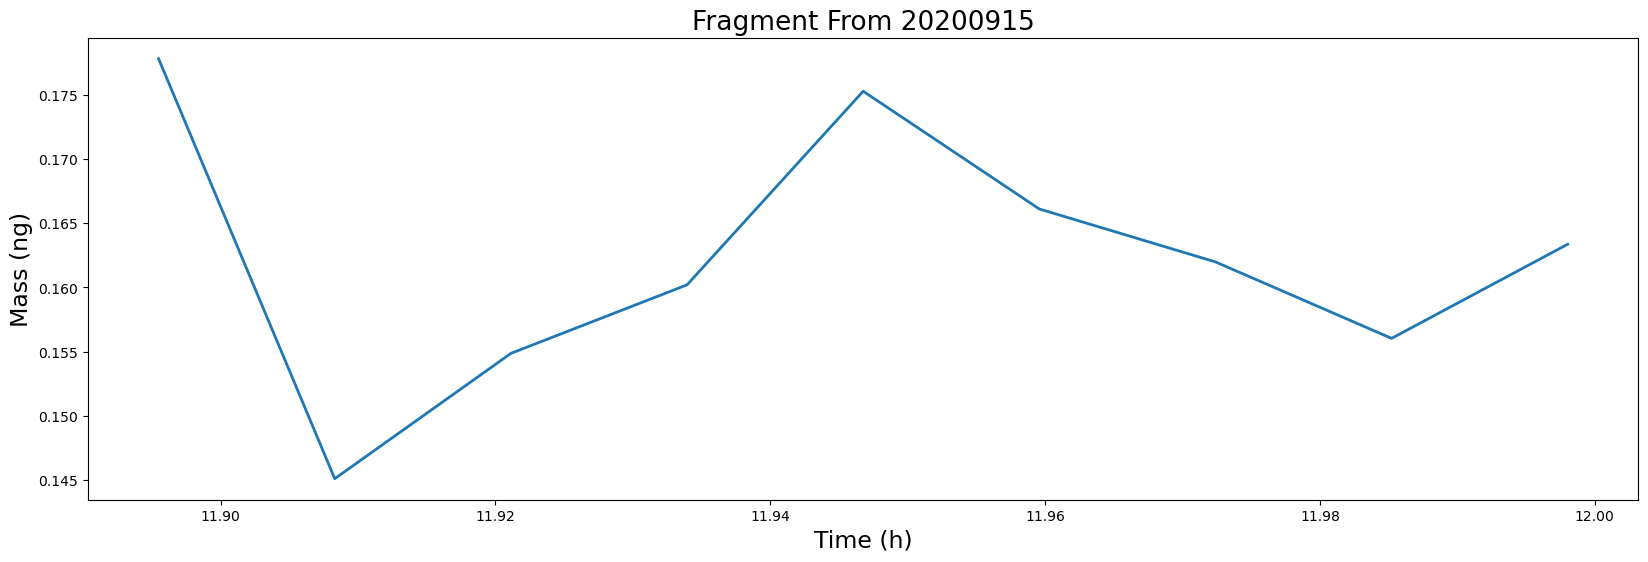

In [72]:
plt.plot(df15['time'].iloc[df15_motif_index : df15_motif_index + m].values, df15['mass'].iloc[df15_motif_index : df15_motif_index + m].values, label='20200915', linewidth=2)

plt.title('Fragment From 20200915', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()